# i590 Final Report (BikeVendor): Jessica Johnson

This report is an analysis of differnt models that are sold by various bike vendors. 
There are 96 different bike models that are sold by 30 different vendors.
Model, category1, category2, and frame are objects, price is an integer, and the vendor values are floats.
The value of the bike vendor columns represent eh percentage of the stock of that bike in comparison to other bikes in the shop.

Analysis of range and disperity of integer and float variables:
Price: Data is skewed left with a mean of 3953, min of 415 and a max of 12790
Category1 has 2 values: Mountain and Road
Category 2 has 9 different values
Frame has 2 different values: Aluminum and carbon.

Preprocessing will consist of potentially removing outliers. There are no null values so imputation is not a concern.

It would be intersting to see what affects the prices of bikes.

In [109]:
#import libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

#import data
df = pd.read_csv("C:/Users/hp/Downloads/bikevendors.csv")

#get summary information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 35 columns):
model                           97 non-null object
category1                       97 non-null object
category2                       97 non-null object
frame                           97 non-null object
price                           97 non-null int64
Albuquerque Cycles              97 non-null float64
Ann Arbor Speed                 97 non-null float64
Austin Cruisers                 97 non-null float64
Cincinnati Speed                97 non-null float64
Columbus Race Equipment         97 non-null float64
Dallas Cycles                   97 non-null float64
Denver Bike Shop                97 non-null float64
Detroit Cycles                  97 non-null float64
Indianapolis Velocipedes        97 non-null float64
Ithaca Mountain Climbers        97 non-null float64
Kansas City 29ers               97 non-null float64
Las Vegas Cycles                97 non-null float64
Los Angeles Cycles 

In [79]:
#obtain statistical information on numerical variable
print(df.price.describe())

count       97.000000
mean      3953.762887
std       2871.891710
min        415.000000
25%       1950.000000
50%       3200.000000
75%       5330.000000
max      12790.000000
Name: price, dtype: float64


(array([18., 28., 16., 13.,  7.,  4.,  5.,  1.,  2.,  3.]),
 array([  415. ,  1652.5,  2890. ,  4127.5,  5365. ,  6602.5,  7840. ,
         9077.5, 10315. , 11552.5, 12790. ]),
 <a list of 10 Patch objects>)

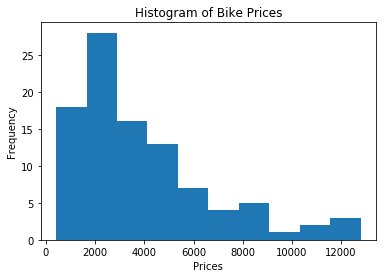

In [48]:
#Show distribution of prices
plt.title('Histogram of Bike Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.hist(df.price, bins=10) 

Text(0.5,1,'Count Plot of Category1 and Category2')

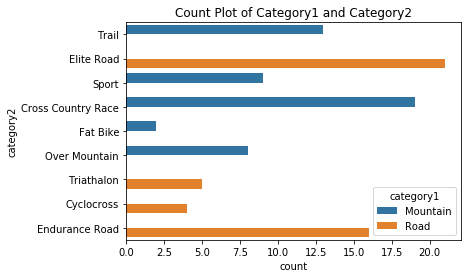

In [80]:
#Count of Category2 grouped by category1
sns.countplot(y="category2", hue="category1", data=df).set_title('Count Plot of Category1 and Category2')

In [83]:
#Change categorical variable to numeric
lb_make = LabelEncoder()
df['category2'] = lb_make.fit_transform(df['category2'])

In [84]:
#Linear regression: create dependent and independent variables 
y = df.price
X = df.category2

In [85]:
#reshape X and y
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

In [88]:
# Create the regression model
reg = linear_model.LinearRegression()

In [89]:
#Create prediction variable
pred = np.linspace(min(X), max(X)).reshape(-1,1)

In [108]:
# Fit and summarize OLS model
mod = sm.OLS(y, X)
regfit = mod.fit()
print(regfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     46.60
Date:                Fri, 13 Dec 2019   Prob (F-statistic):           7.85e-10
Time:                        03:00:15   Log-Likelihood:                -942.22
No. Observations:                  97   AIC:                             1886.
Df Residuals:                      96   BIC:                             1889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           657.4613     96.309      6.827      0.0

Summary table show that there isn't a significant relationship between the x and y variables as the r2 figure is low.

In [96]:
#Compute predictions over y_pred
y_pred = reg.predict(pred)

In [97]:
#print r2 score
print(reg.score(X, y))

0.0416687642872684


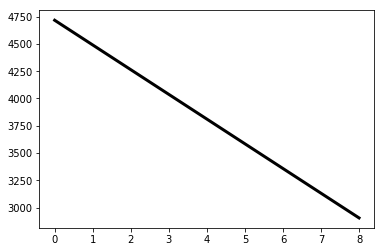

In [93]:
# Plot regression line
plt.plot(pred, y_pred, color='black', linewidth=3)
plt.show()

In [104]:
 print(regfit.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'